In [30]:
import mne 
import mne_bids
import ccs_eeg_semesterproject
from mne_bids import BIDSPath, read_raw_bids



In [31]:
subjectid = '037'
task = 'N170'
suffix = 'eeg'
session = task
datatype = suffix
root = "bids/n170"

In [32]:
faces = ['stimulus/{}'.format(i) for i in range(1,41)]
cars = ['stimulus/{}'.format(i) for i in range(41,81)]
faces_scrambled = ['stimulus/{}'.format(i) for i in range(101,141)]
cars_scrambled = ['stimulus/{}'.format(i) for i in range(141, 181)]
print(faces, cars, faces_scrambled, cars_scrambled)

['stimulus/1', 'stimulus/2', 'stimulus/3', 'stimulus/4', 'stimulus/5', 'stimulus/6', 'stimulus/7', 'stimulus/8', 'stimulus/9', 'stimulus/10', 'stimulus/11', 'stimulus/12', 'stimulus/13', 'stimulus/14', 'stimulus/15', 'stimulus/16', 'stimulus/17', 'stimulus/18', 'stimulus/19', 'stimulus/20', 'stimulus/21', 'stimulus/22', 'stimulus/23', 'stimulus/24', 'stimulus/25', 'stimulus/26', 'stimulus/27', 'stimulus/28', 'stimulus/29', 'stimulus/30', 'stimulus/31', 'stimulus/32', 'stimulus/33', 'stimulus/34', 'stimulus/35', 'stimulus/36', 'stimulus/37', 'stimulus/38', 'stimulus/39', 'stimulus/40'] ['stimulus/41', 'stimulus/42', 'stimulus/43', 'stimulus/44', 'stimulus/45', 'stimulus/46', 'stimulus/47', 'stimulus/48', 'stimulus/49', 'stimulus/50', 'stimulus/51', 'stimulus/52', 'stimulus/53', 'stimulus/54', 'stimulus/55', 'stimulus/56', 'stimulus/57', 'stimulus/58', 'stimulus/59', 'stimulus/60', 'stimulus/61', 'stimulus/62', 'stimulus/63', 'stimulus/64', 'stimulus/65', 'stimulus/66', 'stimulus/67', 's

In [33]:
bids_path = BIDSPath(subject=subjectid, task=task, session=session,
                         datatype=datatype, suffix=suffix,
                         root=root)

# read the file
raw = read_raw_bids(bids_path)

raw.set_montage('standard_1020', match_case=False)
raw.load_data()


Reading /home/jinaz/Desktop/EEG-semproject/bids/n170/sub-037/ses-N170/eeg/sub-037_ses-N170_task-N170_eeg.fdt
Reading events from bids/n170/sub-037/ses-N170/eeg/sub-037_ses-N170_task-N170_events.tsv.
The event "response" refers to multiple event values. Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> respo

<ipython-input-33-948e5d412381>:6: RuntimeWarning: Data file name in EEG.data (sub-037_task-N170_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-037_ses-N170_task-N170_eeg.fdt).
  raw = read_raw_bids(bids_path)


    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renami

<ipython-input-33-948e5d412381>:6: RuntimeWarning: Participants file not found for sub-037_ses-N170_task-N170_eeg.set... Not reading in any particpants.tsv data.
  raw = read_raw_bids(bids_path)


<RawEEGLAB | sub-037_ses-N170_task-N170_eeg.fdt, 33 x 595968 (582.0 s), ~150.1 MB, data loaded>

Effective window size : 2.000 (s)


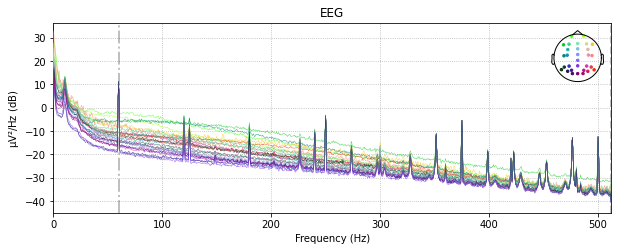

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 6759 samples (6.601 sec)

Effective window size : 2.000 (s)


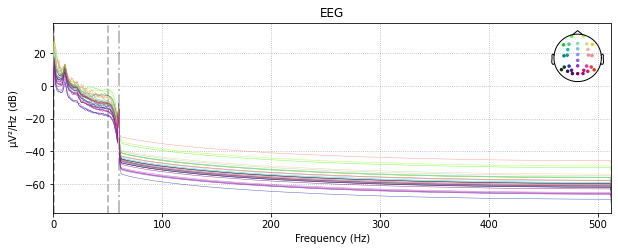

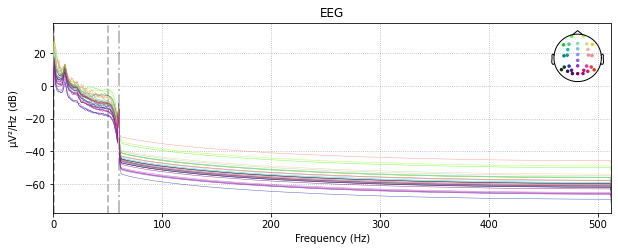

In [34]:
raw.plot_psd()
raw.filter(0.5,50, fir_design='firwin')
raw.plot_psd()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


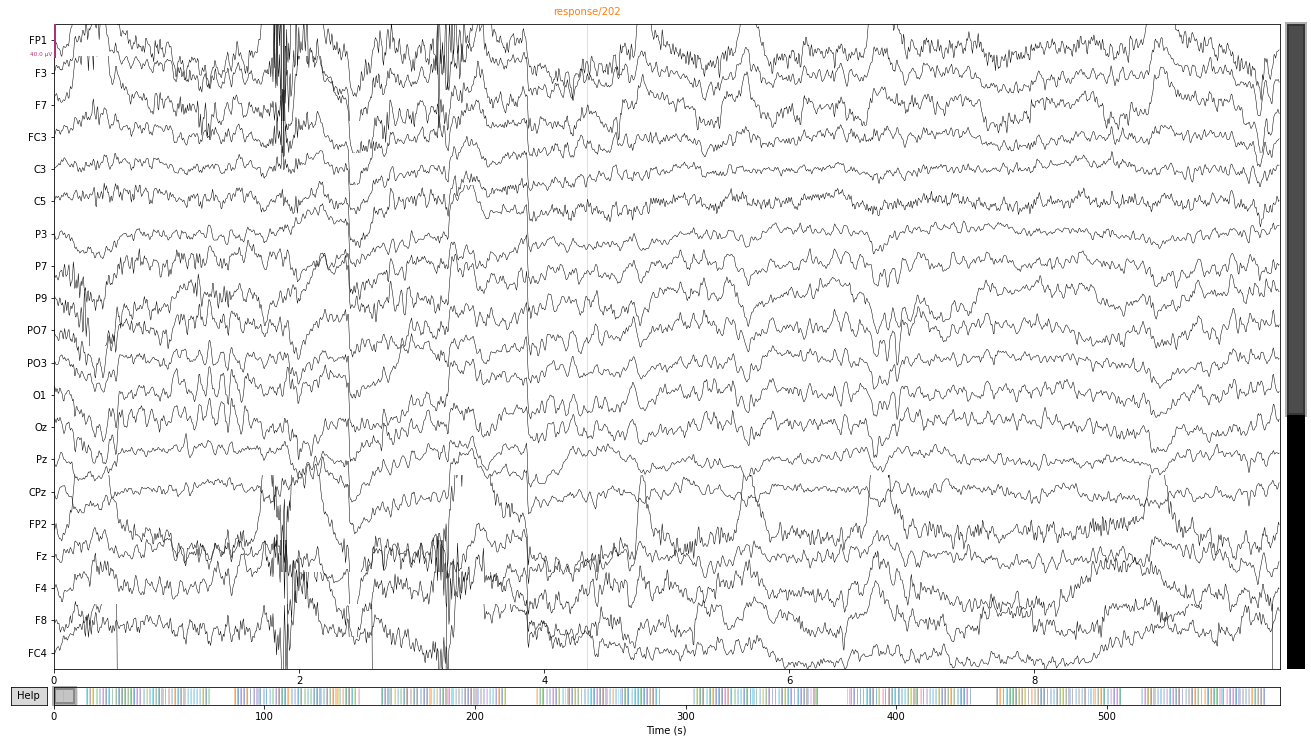

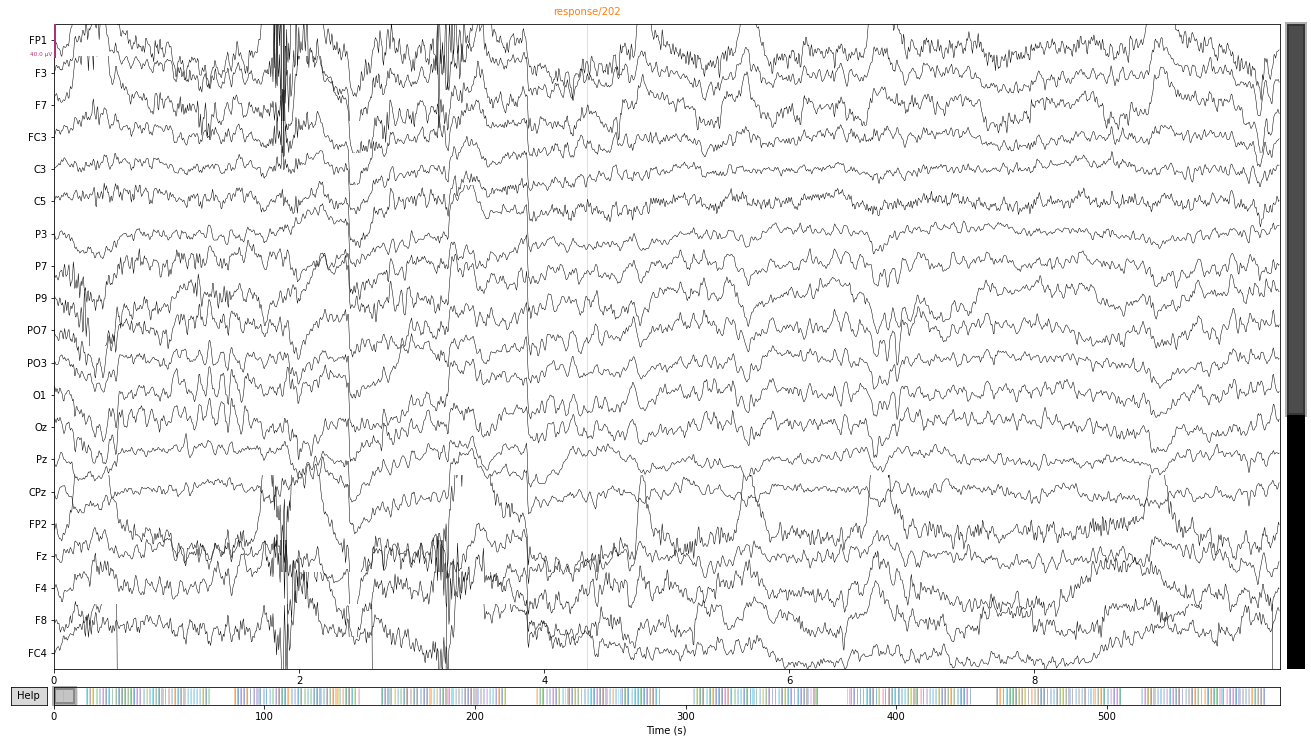

In [35]:
raw.set_eeg_reference('average', projection=False)
raw.plot()

In [36]:
ica, bad_comps = ccs_eeg_semesterproject.load_precomputed_ica(root, subjectid, task)
ccs_eeg_semesterproject.add_ica_info(raw, ica)
annotations, bad_channels = ccs_eeg_semesterproject.load_precomputed_badData(root, subjectid, task)

bids/n170/sub-037/ses-N170/eeg/sub-037_ses-N170_task-N170_


/home/jinaz/Desktop/EEG-semproject/ccs_eeg_semesterproject.py:102: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ica.ICA(method='imported_eeglab', n_components=n_components)
/home/jinaz/Desktop/EEG-semproject/ccs_eeg_semesterproject.py:71: UserWarning: loadtxt: Empty input file: "bids/n170/sub-037/ses-N170/eeg/sub-037_ses-N170_task-N170_badChannels.tsv"
  badChannels = np.loadtxt(fn + 'badChannels.tsv', delimiter='\t')


In [37]:
bad_comps, ica, annotations, bad_channels

([0.0],
 <ICA | epochs decomposition, fit (imported_eeglab):  samples, 30 components, channels used: "eeg">,
 <Annotations | 5 segments: BAD_asrAutoDetect (5)>,
 array([], dtype=int64))

In [38]:
for annot in annotations:
    raw.annotations.append(annot['onset'], annot['duration'], annot['description'])



raw.interpolate_bads()

<ipython-input-38-de8c6fba8c41>:6: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads()


<RawEEGLAB | sub-037_ses-N170_task-N170_eeg.fdt, 33 x 595968 (582.0 s), ~150.1 MB, data loaded>

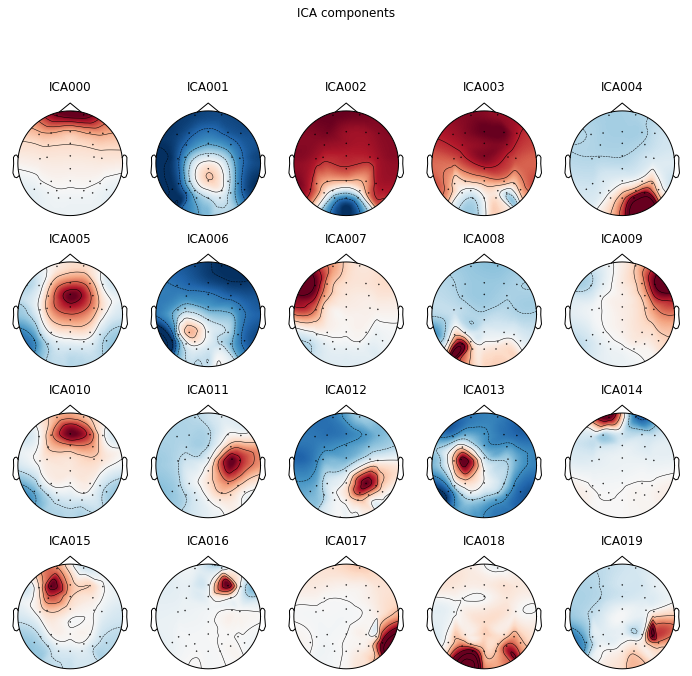

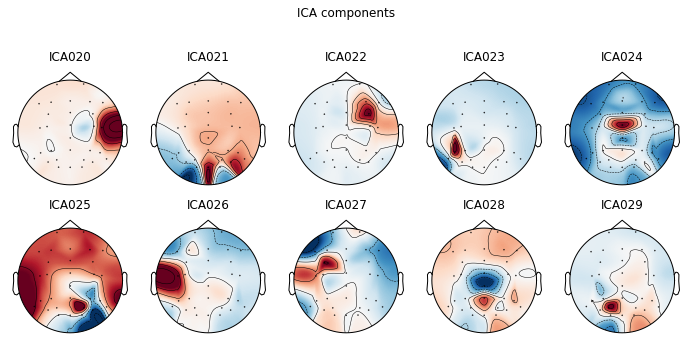

[<MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 702x357.12 with 10 Axes>]

In [39]:
ica.plot_components()

Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components


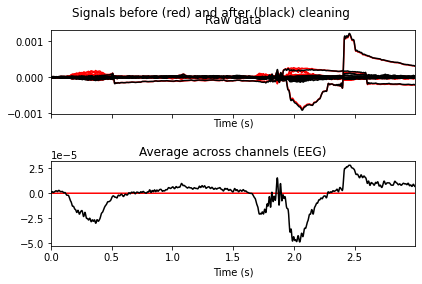

Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components


<RawEEGLAB | sub-037_ses-N170_task-N170_eeg.fdt, 33 x 595968 (582.0 s), ~150.1 MB, data loaded>

In [40]:
ica.plot_overlay(raw, exclude=bad_comps)
ica.apply(raw, exclude=bad_comps)


In [41]:
stimuluskey = 'stimulus'
responsekey = 'response'

evts, evtsdict = mne.events_from_annotations(raw)

carkeys = [evtsdict.get(i) for i in evtsdict.keys() if i in cars]
facekeys = [evtsdict.get(i) for i in evtsdict.keys() if i in faces]

scrcarkeys = [evtsdict.get(i) for i in evtsdict.keys() if i in cars_scrambled]
scrfacekeys = [evtsdict.get(i) for i in evtsdict.keys() if i in faces_scrambled]



Used Annotations descriptions: ['response/201', 'response/202', 'stimulus/1', 'stimulus/10', 'stimulus/101', 'stimulus/102', 'stimulus/103', 'stimulus/104', 'stimulus/105', 'stimulus/106', 'stimulus/107', 'stimulus/108', 'stimulus/109', 'stimulus/11', 'stimulus/110', 'stimulus/111', 'stimulus/112', 'stimulus/113', 'stimulus/114', 'stimulus/115', 'stimulus/116', 'stimulus/117', 'stimulus/118', 'stimulus/119', 'stimulus/12', 'stimulus/120', 'stimulus/121', 'stimulus/122', 'stimulus/123', 'stimulus/124', 'stimulus/125', 'stimulus/126', 'stimulus/127', 'stimulus/128', 'stimulus/129', 'stimulus/13', 'stimulus/130', 'stimulus/131', 'stimulus/132', 'stimulus/133', 'stimulus/134', 'stimulus/135', 'stimulus/136', 'stimulus/137', 'stimulus/138', 'stimulus/139', 'stimulus/14', 'stimulus/140', 'stimulus/141', 'stimulus/142', 'stimulus/143', 'stimulus/144', 'stimulus/145', 'stimulus/146', 'stimulus/147', 'stimulus/148', 'stimulus/149', 'stimulus/15', 'stimulus/150', 'stimulus/151', 'stimulus/152', 

In [42]:
eventid = {'faces': {i for i in facekeys},
           'cars': {i for i in carkeys},
           'faces_scrambled': {i for i in scrfacekeys},
           'cars_scrambled': {i for i in scrcarkeys},
           'response_correct': 1,
           'response_false':2}

eventsdict = {'faces':3, 'cars':4, 'scrambled_faces':5, 'scrambled_cars':6, 'response_correct':1, 'response_false':2}

In [43]:
eventsdict

{'faces': 3,
 'cars': 4,
 'scrambled_faces': 5,
 'scrambled_cars': 6,
 'response_correct': 1,
 'response_false': 2}

In [44]:
for evt in evts:
    if evt[2] in eventid['faces']:
        evt[2] = 3
    elif evt[2] in eventid['cars']:
        evt[2] = 4
    elif evt[2] in eventid['faces_scrambled']:
        evt[2] = 5
    elif evt[2] in eventid['cars_scrambled']:
        evt[2] = 6
    elif evt[2] == eventid['response_correct']:
        evt[2] = 1
    elif evt[2] == eventid['response_false']:
        evt[2] = 2

In [45]:
print([evt for evt in evts])

[array([4451,    0,    2]), array([11324,     0,     2]), array([15654,     0,     6]), array([16165,     0,     1]), array([17104,     0,     4]), array([17590,     0,     1]), array([18742,     0,     4]), array([19122,     0,     1]), array([20311,     0,     5]), array([20933,     0,     1]), array([21813,     0,     5]), array([22235,     0,     1]), array([23451,     0,     4]), array([23832,     0,     1]), array([25071,     0,     6]), array([25545,     0,     1]), array([26521,     0,     6]), array([27019,     0,     1]), array([28074,     0,     5]), array([28461,     0,     1]), array([29678,     0,     3]), array([30116,     0,     1]), array([31179,     0,     3]), array([31525,     0,     1]), array([32697,     0,     6]), array([33228,     0,     1]), array([34148,     0,     3]), array([34703,     0,     1]), array([35598,     0,     4]), array([36202,     0,     1]), array([37116,     0,     6]), array([37554,     0,     1]), array([38617,     0,     6]), array([39012

In [46]:
evtsdict, eventsdict

({'response/201': 1,
  'response/202': 2,
  'stimulus/1': 3,
  'stimulus/10': 4,
  'stimulus/101': 5,
  'stimulus/102': 6,
  'stimulus/103': 7,
  'stimulus/104': 8,
  'stimulus/105': 9,
  'stimulus/106': 10,
  'stimulus/107': 11,
  'stimulus/108': 12,
  'stimulus/109': 13,
  'stimulus/11': 14,
  'stimulus/110': 15,
  'stimulus/111': 16,
  'stimulus/112': 17,
  'stimulus/113': 18,
  'stimulus/114': 19,
  'stimulus/115': 20,
  'stimulus/116': 21,
  'stimulus/117': 22,
  'stimulus/118': 23,
  'stimulus/119': 24,
  'stimulus/12': 25,
  'stimulus/120': 26,
  'stimulus/121': 27,
  'stimulus/122': 28,
  'stimulus/123': 29,
  'stimulus/124': 30,
  'stimulus/125': 31,
  'stimulus/126': 32,
  'stimulus/127': 33,
  'stimulus/128': 34,
  'stimulus/129': 35,
  'stimulus/13': 36,
  'stimulus/130': 37,
  'stimulus/131': 38,
  'stimulus/132': 39,
  'stimulus/133': 40,
  'stimulus/134': 41,
  'stimulus/135': 42,
  'stimulus/136': 43,
  'stimulus/137': 44,
  'stimulus/138': 45,
  'stimulus/139': 46,
  '

In [47]:
raw.ch_names

['FP1',
 'F3',
 'F7',
 'FC3',
 'C3',
 'C5',
 'P3',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Oz',
 'Pz',
 'CPz',
 'FP2',
 'Fz',
 'F4',
 'F8',
 'FC4',
 'FCz',
 'Cz',
 'C4',
 'C6',
 'P4',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2',
 'HEOG_left',
 'HEOG_right',
 'VEOG_lower']

Linear baseline correction

In [48]:
epochs = mne.Epochs(raw, evts, eventsdict, tmin=-0.2, tmax=1)

Not setting metadata
Not setting metadata
642 matching events found
Setting baseline interval to [-0.2001953125, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [49]:
evoked_cars = epochs['cars'].average()
evoked_faces = epochs['faces'].average()
evoked_scr_cars = epochs['scrambled_cars'].average()
evoked_scr_faces = epochs['scrambled_faces'].average()
evoked_resp_c = epochs['response_correct'].average()
evoked_resp_f = epochs['response_false'].average()

#evoked_cars = evoked_cars.apply_baseline((None,0))
#evoked_faces= evoked_faces.apply_baseline((None,0))
#evoked_scr_cars=evoked_scr_cars.apply_baseline((None,0))
#evoked_scr_faces=evoked_scr_faces.apply_baseline((None,0))

Need more than one channel to make topography for eeg. Disabling interactivity.


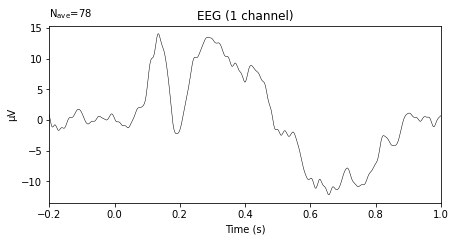

Need more than one channel to make topography for eeg. Disabling interactivity.


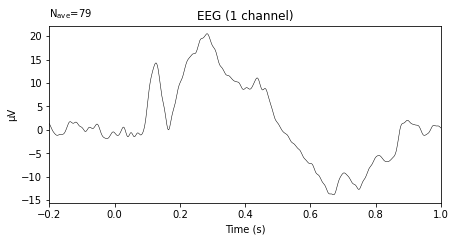

Need more than one channel to make topography for eeg. Disabling interactivity.


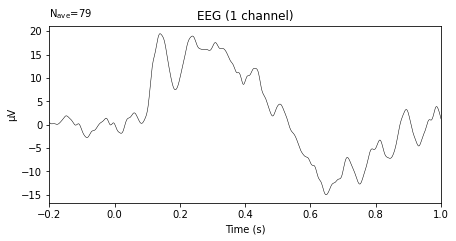

Need more than one channel to make topography for eeg. Disabling interactivity.


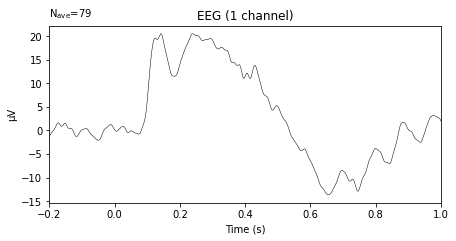

Need more than one channel to make topography for eeg. Disabling interactivity.


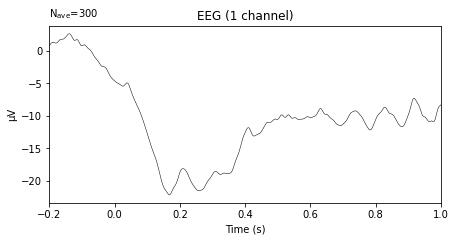

Need more than one channel to make topography for eeg. Disabling interactivity.


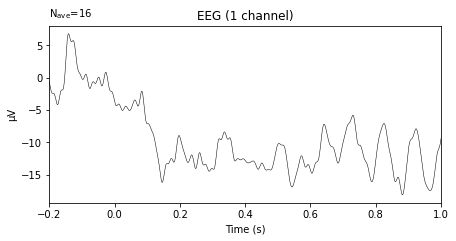

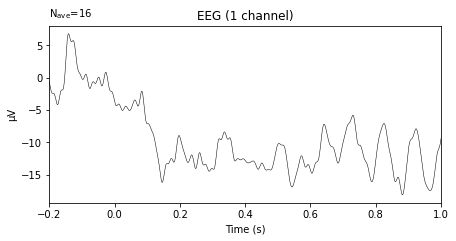

In [50]:
evoked_cars.plot(picks=['PO8'])
evoked_faces.plot(picks=['PO8'])
evoked_scr_cars.plot(picks=['PO8'])
evoked_scr_faces.plot(picks=['PO8'])
evoked_resp_c.plot(picks=['PO8'])
evoked_resp_f.plot(picks=['PO8'])

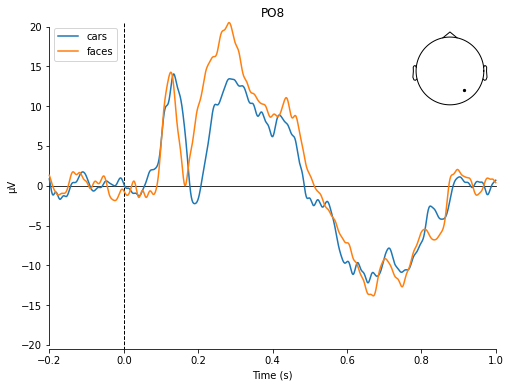

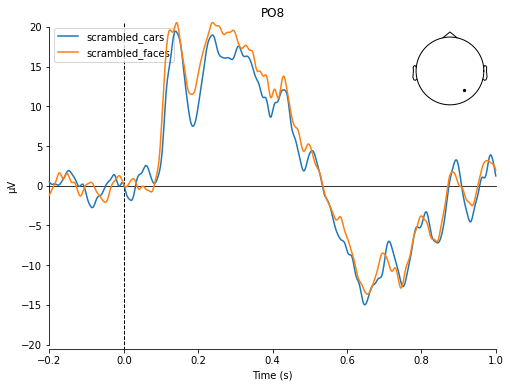

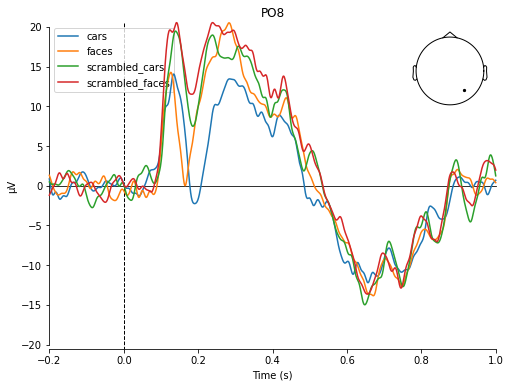

[<Figure size 576x432 with 2 Axes>]

In [51]:
mne.viz.plot_compare_evokeds([evoked_cars, evoked_faces], picks=['PO8'])
mne.viz.plot_compare_evokeds([evoked_scr_cars, evoked_scr_faces], picks=['PO8'])

mne.viz.plot_compare_evokeds([evoked_cars, evoked_faces, evoked_scr_cars, evoked_scr_faces], picks=['PO8'])

In [52]:


evoked_cars.pick_channels(['PO8'])
evoked_faces.pick_channels(['PO8'])
evoked_scr_cars.pick_channels(['PO8'])
evoked_scr_faces.pick_channels(['PO8'])



#evoked_cars.pick_channels([channel]).data[0][time]

<Evoked | 'scrambled_faces' (average, N=79), -0.2002 – 1 sec, baseline -0.200195 – 0 sec, 1 ch, ~30 kB>

In [53]:
tmin,tmax = evoked_cars.baseline 

In [54]:
baselines = mne.Epochs(raw, evts, eventsdict, tmin=tmin, tmax=tmax)

Not setting metadata
Not setting metadata
642 matching events found
Setting baseline interval to [-0.2001953125, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [55]:
carbaseline = baselines['cars'].average()
facebaseline = baselines['faces'].average()
scrcarbaseline = baselines['scrambled_cars'].average()
scrfacebaseline = baselines['scrambled_faces'].average()

In [56]:
cd = carbaseline.pick_channels(['PO8']).data 
fd = facebaseline.pick_channels(['PO8']).data
sccd = scrcarbaseline.pick_channels(['PO8']).data 
scfd = scrfacebaseline.pick_channels(['PO8']).data 


In [57]:
import numpy as np
np.average(cd), np.average(fd), np.average(sccd), np.average(scfd)

(-9.868345016554956e-23, -1.6447241694258258e-23, 0.0, 1.151306918598078e-22)

In [58]:
evoked_cars.crop(0.0, 0.25)
evoked_faces.crop(0.0, 0.25)
evoked_scr_cars.crop(0.0, 0.25)
evoked_scr_faces.crop(0.0, 0.25)


<Evoked | 'scrambled_faces' (average, N=79), 0 – 0.25 sec, baseline -0.200195 – 0 sec (baseline period was cropped after baseline correction), 1 ch, ~22 kB>

In [59]:
channel, time, amp = evoked_cars.get_peak(time_as_index=False, return_amplitude=True)
print(channel, time, amp)


channel, time, amp = evoked_faces.get_peak(time_as_index=False, return_amplitude=True)
print(channel, time, amp)

channel, time, amp = evoked_scr_cars.get_peak(time_as_index=False, return_amplitude=True)
print(channel, time, amp)

channel, time, amp = evoked_scr_faces.get_peak(time_as_index=False, return_amplitude=True)
print(channel, time, amp)

PO8 0.1337890625 1.4048050136506646e-05
PO8 0.25 1.6586163281510976e-05
PO8 0.138671875 1.9451161358185616e-05
PO8 0.1416015625 2.052131726991338e-05
